In [50]:
import pandas as pd

In [51]:
url = "https://raw.githubusercontent.com/natihuri1/spotifyProject/main/spotifyProject.csv"
spotify_df = pd.read_csv(url)


In [52]:
spotify_df

,Unnamed: 0,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,39995,Electronic,Zomboy,Young & Dangerous - Gentlemens Club Remix,4iL7kCCiy2FjGFqxUGmA2K,29,0.00661,0.573,240000,0.784,0.130000,F,0.2640,-4.047,Minor,0.0421,145.042,4/4,0.163
39996,39996,Electronic,MC Hammer,Intro: Turn This Mutha Out,4X8EsIbtmKCyBaxhm21EHh,24,0.01010,0.864,140434,0.916,0.050600,C#,0.3500,-11.031,Major,0.0483,111.141,4/4,0.919
39997,39997,Electronic,Air,Au fond du rêve doré,6dacsOp1V5oI22BQ2wZxfq,35,0.71500,0.451,121880,0.541,0.764000,G,0.1720,-8.018,Major,0.0271,103.123,3/4,0.234
39998,39998,Electronic,Bent,Strictly Bongo,5fGuXPBg1hwskIq6B7aRye,30,0.04340,0.597,322173,0.556,0.008730,G,0.1810,-10.872,Major,0.0477,80.004,4/4,0.552


In [41]:
spotify_df.isnull().sum()

Unnamed: 0          0
genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

### לא קיימים ערכים חסרים בדאטה שלנו

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'valence'}>]], dtype=object)

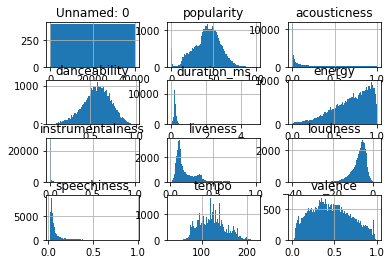

In [53]:
spotify_df.hist(bins=100)

In [62]:
print(spotify_df.popularity.max())

100


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'valence'}>]], dtype=object)

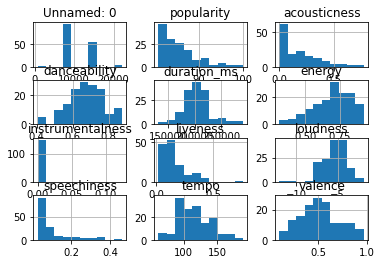

In [78]:
popular_above_80 = spotify_df[spotify_df.popularity > 80]
not_popular = spotify_df[(spotify_df.popularity < 80) & (spotify_df.popularity > 20)]
popular_above_80.hist(bins=10)

### נמיין את הנתונים לשתי סוגים מוצלח/לא מוצלח
##### מוצלח - פופלריות מעל 80
##### לא מוצלח - פופלריות בין 20 ל-80 
שירים שהפופלריות שלהם מתחת ל20 לא בהכרח מושפעים ממרכיבי השיר אלה מגורמים אחרים ( חוסר חשיפה ) לכן בהשוואה נרצה להשוות בין שירים שקיבלו חשיפה ולא הצליחו לשירים שקיבלו חשיפה והצליחו 

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'valence'}>]], dtype=object)

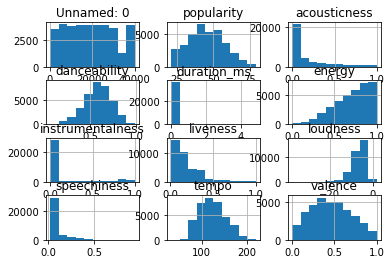

In [79]:
not_popular.hist(bins=10)